In [21]:
import keras
import tensorflow as tf
import matplotlib
import numpy as np

In [2]:
keras.__version__

'2.8.0'

In [3]:
from keras import Sequential

Sequential lets you build an empty object or you can fill the object with some models.

In [4]:
model = Sequential()

2022-05-27 16:03:14.696229: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Building the model

- To add layers, need to import the dense class
- The parameters
    - The number of neurons is 'units'
    - activation function
    - The very first dense layer needs the input dimensions
- In our second layer (This is our output layer in this situation)
    - If the layer is the output layer, the number of units should be the number of classes
    
**Model.summary() gives info about the model**

#### Remember different activation functions are used for different types of problems
- Softmax: classification
-         : binary classification
-         : Regression

In [5]:
from keras.layers import Dense #so we can add Dense layers

#adds a layer to the sequential model we just built
model.add(Dense(units =64, activation='relu', input_dim=100))

#output layer (5 classes in problem)
model.add(Dense(units=5, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 6,789
Trainable params: 6,789
Non-trainable params: 0
_________________________________________________________________


In [8]:
# we can also separate the activation function instead of creating it within the layer
from keras.layers import Activation
model2 = Sequential()
model2.add(Dense(units =64, input_dim=100))
model2.add(Activation('relu'))
model2.add(Dense(units=5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 6,789
Trainable params: 6,789
Non-trainable params: 0
_________________________________________________________________


### Model Types
**Sequential()** : Good for deep learning with sequential tasks

## Optimizers
- can define what the loss function is
- for 'loss' parameter
    - What is shown below
    - MSE
    - Review for what other labels are available as a loss function
- for 'optimizer'
    - 'SGD
        - Best to have own SGD defined so you can tweak learning rate, momentum, etc. 
- for 'metrics'
    - what metrics do you want to show in the log?
    - 'accuracy'
### Make sure we are running on GPU, if not it will be super slow. Can use Google Colab if needed

In [9]:
model.compile(loss ='categorical_cross_entropy', optimizer='sgd', metrics = ['accruracy'])

## Example
- Our example dataset will come from the tensorflow package

## Step 1: Download the dataset

In [12]:
(train_images, train_labels), (test_images, test_labels) = \
tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Step 2) Understand the data format

The images are given as a 3-D array of integer values that is of the shape (N, 28, 28), where *N* is the number of images in the training or test set.
The labels are 1-D array of the integer values of each image

In [13]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [14]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Step 3) Visualize the Data

Let's see how the images look. This function shows a random example along with it's corresponding label


Label: 7


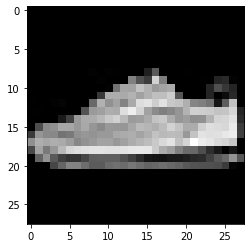

In [19]:
%matplotlib inline

import random
import matplotlib.pyplot as plt

i = random.randint(0, 100)

print('Label: %s' % train_labels[i])
plt.imshow(train_images[i], cmap='gray')

Each training and test example is assigned one of the following labels

| Label | Description |
| --- | --- |
| 0 | T-shit/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle Boot |

## Step 4) Reformat the Images
Here, we'll flatten (or unstack) the images. There are deep learning techniques that work with 2d images directly (rather than their flattened representation), but we'll start with this format. Instead of woorking with a 28 x 28 image, we'll unstack it into a 28 x 28 = 74 length array.
   - We want to convert 3D array of shape (N, 28, 28) to a 2D array of shape (N, 784) where the second dimension is just an array of all the pixels in an image. This is called flattening, or unstacking, the images
   - We also want to convert the pixel values from a number between 0 and 255 to a number between 0 and 1

In [22]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

# Reshape from (N, 28, 28) to (N, 28 * 28 = 784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))

# Convert the array to float32 as opposed to uint8
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
train_images /= 255
test_images /= 255

## Step 5) Reformat the labels

Next, we want to convert the labels from an integer format ('2' or 'pullover'), to a one hot encoding. To do so, we'll use the `tf.keras.utils.to_categorical` function. 

In [25]:
NUM_CAT = 10

print("Before", train_labels[0]) #format of labels before conversion

train_labels_ = tf.keras.utils.to_categorical(train_labels, NUM_CAT)

print("After", train_labels_[0]) #format after conversion

test_labels_ = tf.keras.utils.to_categorical(test_labels, NUM_CAT)

Before 9
After [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Step 6) Build the model

Now we'll create our neural network using the [Keras Sequential API]( https://keras.io/api/models/sequential/). Keras is a high-level API to build and train deep learning models and is user friendly, modular and easy to extend. `tf.keras` is TensorFlow's implementation of this API and it supports such things as eager execution, `tf.data` pipelines and estimators

Architecture wise, we'll use a single hidden layer network, where:
   - The hidden layer will have 512 units using the **ReLU* activation function**
   - The output layer will have 10 units and use **softmax** function
   - Notice, we specify the input shape on the first layer. If you add subsequent layers, this is not necessary
   - We will use **categorica_crossentropy** loss function and the **SGD_optimizer**

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_dim=784))
model.add(tf.keras.layers.Dense(NUM_CAT, activation=tf.nn.softmax))

# We will now compile and print out a summary of our model
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Step 7) Training

Next, we will train the model by using the **fit method** for 5 epochs. We will keep track of the training loss and accuracy as we go. Please be patient as this step may take a while depending on your hardware.

In [29]:
train_labels_.shape

(60000, 10)

In [ ]:
tf.config.run_functions_eagerly(True) #prevents weir tensorflow error

In [32]:
model.fit(train_images, train_labels_, epochs=5)

Epoch 1/5
  13/1875 [..............................] - ETA: 17s - loss: 1.6185 - accuracy: 0.4495

/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1875/1875 [==============================] - 18s 9ms/step - loss: 0.5171 - accuracy: 0.8171
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3867 - accuracy: 0.8593
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3498 - accuracy: 0.8714
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3241 - accuracy: 0.8810
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3046 - accuracy: 0.8887


## Step 8) Training

Now that we have trained our model, we want to evaluate it. Sure, our model is >88% accurayte on the training set, but what about on data it hasn't seen before? The test accuracy is a good metric for that.

In [34]:
loss, accuracy = model.evaluate(test_images, test_labels_)
print("Test Accuracy: %.2f" % (accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.3558 - accuracy: 0.8737
Test Accuracy: 0.87


## To Do

Congrats! You have sucessfully used TensorFlow Keras to train a model on the Fashion-MNIST dataset. Now, try with different hyperparameters such as:
- Number of neurons in a layer
- Number of layers
- Learning Rate
- Different Optimizer
- Number of Epochs